In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv("diabetes_prediction_dataset.csv")
data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [3]:
from sklearn.model_selection import train_test_split

In [4]:
x = data.drop("diabetes", axis = 1)
y = data["diabetes"]

In [5]:
from imblearn.over_sampling import RandomOverSampler

In [6]:
oversample = RandomOverSampler(sampling_strategy='minority')
x_over, y_over = oversample.fit_resample(x, y)

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x_over, y_over) 

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'HbA1c_level'}>,
        <Axes: title={'center': 'blood_glucose_level'}>]], dtype=object)

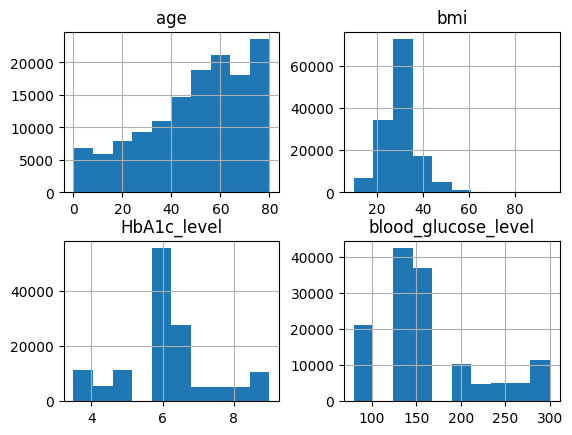

In [8]:
x_train[["age",	"bmi", "HbA1c_level", "blood_glucose_level"]].hist()

In [9]:
x_train["gender"] = (x_train["gender"] == "Male").astype("int8")
x_train_sc = x_train[["age",	"bmi", "HbA1c_level", "blood_glucose_level"]]
scl = StandardScaler()
x_train_sc = pd.DataFrame(scl.fit_transform(x_train_sc), columns = x_train_sc.columns, index = x_train_sc.index)
x_train[["age",	"bmi", "HbA1c_level", "blood_glucose_level"]] = x_train_sc

In [10]:
x_train

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
68616,1,-0.254532,0,0,never,1.095491,-0.284605,-0.146936
129490,0,0.070534,0,0,current,0.661707,2.061858,0.993458
123256,1,-0.486721,1,0,No Info,-0.083270,0.341118,-0.585549
162460,1,-0.904663,0,0,never,2.309278,0.341118,-0.146936
47980,0,0.720665,0,0,No Info,-1.070735,-0.362820,-1.287330
...,...,...,...,...,...,...,...,...
119661,1,-0.115218,0,0,ever,-0.380991,1.592565,0.642568
35716,0,1.324358,0,0,never,-0.513013,0.028257,-0.322381
4236,0,0.813541,0,0,never,0.001601,-0.284605,-1.111885
150791,0,0.116972,0,0,No Info,1.328549,2.061858,-0.059213


In [16]:
x_train["smoking_history"].index

Index([ 68616, 129490, 123256, 162460,  47980, 130865, 142624,  59874,  61267,
        38477,
       ...
       176282,  82964, 110215,  65588,  82467, 119661,  35716,   4236, 150791,
        54092],
      dtype='int64', length=137250)

In [19]:
for i in x_train["smoking_history"].index:
    if x_train.at[i, "smoking_history"] == "No Info":
        x_train.at[i, "smoking_history"] = np.random.choice(["never", "former", "current", "not current", "ever"], p = [0.5, 0.18, 0.13, 0.11, 0.08])

In [20]:
x_train["smoking_history"].value_counts()

smoking_history
never          69746
former         25329
current        18729
not current    13997
ever            9449
Name: count, dtype: int64

In [21]:
x_train

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
68616,1,-0.254532,0,0,never,1.095491,-0.284605,-0.146936
129490,0,0.070534,0,0,current,0.661707,2.061858,0.993458
123256,1,-0.486721,1,0,never,-0.083270,0.341118,-0.585549
162460,1,-0.904663,0,0,never,2.309278,0.341118,-0.146936
47980,0,0.720665,0,0,never,-1.070735,-0.362820,-1.287330
...,...,...,...,...,...,...,...,...
119661,1,-0.115218,0,0,ever,-0.380991,1.592565,0.642568
35716,0,1.324358,0,0,never,-0.513013,0.028257,-0.322381
4236,0,0.813541,0,0,never,0.001601,-0.284605,-1.111885
150791,0,0.116972,0,0,never,1.328549,2.061858,-0.059213


In [23]:
x_train = pd.get_dummies(x_train, columns = ["smoking_history"], dtype = "int8")
x_train

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
68616,1,-0.254532,0,0,1.095491,-0.284605,-0.146936,0,0,0,1,0
129490,0,0.070534,0,0,0.661707,2.061858,0.993458,1,0,0,0,0
123256,1,-0.486721,1,0,-0.083270,0.341118,-0.585549,0,0,0,1,0
162460,1,-0.904663,0,0,2.309278,0.341118,-0.146936,0,0,0,1,0
47980,0,0.720665,0,0,-1.070735,-0.362820,-1.287330,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
119661,1,-0.115218,0,0,-0.380991,1.592565,0.642568,0,1,0,0,0
35716,0,1.324358,0,0,-0.513013,0.028257,-0.322381,0,0,0,1,0
4236,0,0.813541,0,0,0.001601,-0.284605,-1.111885,0,0,0,1,0
150791,0,0.116972,0,0,1.328549,2.061858,-0.059213,0,0,0,1,0


In [24]:
x_test["gender"] = (x_test["gender"] == "Male").astype("int8")
x_test_sc = x_test[["age",	"bmi", "HbA1c_level", "blood_glucose_level"]]
x_test_sc = pd.DataFrame(scl.transform(x_test_sc), columns = x_test_sc.columns, index = x_test_sc.index)
x_test[["age",	"bmi", "HbA1c_level", "blood_glucose_level"]] = x_test_sc

In [28]:
for i in x_test["smoking_history"].index:
    if x_test.at[i, "smoking_history"] == "No Info":
        x_test.at[i, "smoking_history"] = np.random.choice(["never", "former", "current", "not current", "ever"], p = [0.5, 0.18, 0.13, 0.11, 0.08])
x_test = pd.get_dummies(x_test, columns = ["smoking_history"], dtype = "int8")

In [29]:
x_test

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
60119,1,-0.115218,0,0,0.186161,-1.692483,-1.462776,0,0,0,1,0
644,0,-0.997539,0,0,-1.408871,0.028257,-1.111885,0,0,0,1,0
180768,1,-1.740545,0,0,-1.691773,0.497549,-0.146936,0,0,0,0,1
90316,0,-0.300970,0,0,-0.367520,0.341118,-0.076758,0,0,0,1,0
29092,0,-1.647670,0,0,-1.364415,0.341118,-0.410104,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
161893,0,1.370796,0,0,-0.283996,-0.128174,-0.076758,0,0,0,1,0
64931,0,-0.115218,0,0,-0.856537,-1.692483,-0.410104,0,0,1,0,0
173832,0,-1.090414,0,0,0.105332,0.497549,-0.655727,0,0,0,0,1
177537,1,-0.208094,0,0,-0.056327,0.341118,-0.585549,1,0,0,0,0


In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report

In [31]:
model1 = LogisticRegression()
model1.fit(x_train, y_train)
accuracy_score(y_train, model1.predict(x_train)), accuracy_score(y_test, model1.predict(x_test))

(0.8838105646630237, 0.8840218579234973)

In [32]:
model2 = GaussianNB()
model2.fit(x_train, y_train)
accuracy_score(y_train, model2.predict(x_train)), accuracy_score(y_test, model2.predict(x_test))

(0.8346739526411657, 0.8361748633879782)

In [43]:
model3 = KNeighborsClassifier(n_neighbors=2)
model3.fit(x_train, y_train)
accuracy_score(y_train, model3.predict(x_train)), accuracy_score(y_test, model3.predict(x_test))

(0.9937632058287796, 0.9698142076502733)

In [ ]:
# 8 951 938
# 7 952 939
# 5 963 947
# 3 977 957
# 2 993 969